# Seasonal Succession 

### In ecology, beta diversity (β-diversity or true beta diversity) is the ratio between regional and local species diversity.

In [1]:
import warnings
warnings.simplefilter("ignore") # Silence warnings
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import numpy as np
from matplotlib.pyplot import figure
import numpy.ma as ma
from netCDF4 import Dataset as NetCDFFile
import glob
import cartopy
import cartopy.crs as ccrs
import pylab 

import numpy.ma as ma
from netCDF4 import Dataset as NetCDFFile
import glob
import pylab 
from copy import deepcopy
import pandas as pd
import os
import matplotlib
from cartopy.util import add_cyclic_point

In [2]:
import re
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

In [3]:
def adjust_pop_grid(tlon,tlat,field):
    nj = tlon.shape[0]
    ni = tlon.shape[1]
    xL = int(ni/2 - 1)
    xR = int(xL + ni)

    tlon = np.where(np.greater_equal(tlon,np.min(tlon[:,0])),tlon-360.,tlon)
    lon  = np.concatenate((tlon,tlon+360.),1)
    lon = lon[:,xL:xR]

    if ni == 320:
        lon[367:-3,0] = lon[367:-3,0]+360.
    lon = lon - 360.
    lon = np.hstack((lon,lon[:,0:1]+360.))
    if ni == 320:
        lon[367:,-1] = lon[367:,-1] - 360.

    #-- trick cartopy into doing the right thing:
    #   it gets confused when the cyclic coords are identical
    lon[:,0] = lon[:,0]-1e-8

    #-- periodicity
    lat  = np.concatenate((tlat,tlat),1)
    lat = lat[:,xL:xR]
    lat = np.hstack((lat,lat[:,0:1]))

    field = np.ma.concatenate((field,field),1)
    field = field[:,xL:xR]
    field = np.ma.hstack((field,field[:,0:1]))
    return lon,lat,field

In [4]:
### last 20 year climatology of the second cycle representing Jan 1990 - Dec 2009. 
newNCDFfiles = sorted(glob.glob('/glade/campaign/cesm/development/bgcwg/projects/marbl-spectra/GNG595_2ndcycle_1990-2009_clim/*', recursive=True),
                      key=numericalSort)
ds = xr.open_mfdataset(newNCDFfiles,combine='by_coords')

In [5]:
regrid_path = '/glade/scratch/gabyn/SPECTRA/nc_files/regrid'

# Import regridded phytoplankton biomass

In [6]:
path = '/glade/u/home/gabyn/scratch/SPECTRA/nc_files/regrid/'
ppC_ds = xr.open_mfdataset(f'{path}regrid_ppC_62yr_monthly_150m.nc')
mp1C_ds = xr.open_mfdataset(f'{path}regrid_mp1C_62yr_monthly_150m.nc')
mp2C_ds = xr.open_mfdataset(f'{path}regrid_mp2C_62yr_monthly_150m.nc')
mp3C_ds = xr.open_mfdataset(f'{path}regrid_mp3C_62yr_monthly_150m.nc')
mp4C_ds = xr.open_mfdataset(f'{path}regrid_mp4C_62yr_monthly_150m.nc')
diat1C_ds = xr.open_mfdataset(f'{path}regrid_diat1C_62yr_monthly_150m.nc')
diat2C_ds = xr.open_mfdataset(f'{path}regrid_diat2C_62yr_monthly_150m.nc')
diat3C_ds = xr.open_mfdataset(f'{path}regrid_diat3C_62yr_monthly_150m.nc')
diazC_ds = xr.open_mfdataset(f'{path}regrid_diazC_62yr_monthly_150m.nc')

	NC4_open: path /glade/u/home/gabyn/scratch/SPECTRA/nc_files/regrid/regrid_ppC_62yr_monthly_150m.nc mode 4096 params 0
	HDF5 error messages turned on.
			nc4_open_file: path /glade/u/home/gabyn/scratch/SPECTRA/nc_files/regrid/regrid_ppC_62yr_monthly_150m.nc mode 4096
			nc4_grp_list_add: name / 
			nc4_rec_read_metadata: grp->hdr.name /
			found dataset time
			found dataset lon
			found dataset lat
			found dataset month
			found dataset ppC_150m
ERROR: Invalid _NCProperties attribute
		*** NetCDF-4 Internal Metadata: int_ncid 0xd0000 ext_ncid 0xd0000
		FILE - path: /glade/u/home/gabyn/scratch/SPECTRA/nc_files/regrid/regrid_ppC_62yr_monthly_150m.nc cmode: 0x1008 parallel: 0 redef: 0 fill_mode: 0 no_write: 1 next_nc_grpid: 1
		 GROUP - / nc_grpid: 0 nvars: 5 natts: 0
		 DIMENSION - dimid: 0 name: time len: 62 unlimited: 1
		 DIMENSION - dimid: 1 name: lon len: 360 unlimited: 0
		 DIMENSION - dimid: 2 name: lat len: 180 unlimited: 0
		 DIMENSION - dimid: 3 name: month len: 12 unlimited:

In [7]:
ppC_ds.ppC_150m

<xarray.DataArray 'ppC_150m' (time: 62, month: 12, lat: 180, lon: 360)>
dask.array<open_dataset-fe8efa298d72d33e8a6708ccf914dbabppC_150m, shape=(62, 12, 180, 360), dtype=float64, chunksize=(62, 12, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
  * lon      (lon) float64 -180.0 -179.0 -178.0 -177.0 ... 177.0 178.0 179.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * month    (month) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0
Attributes:
    units:        ugC m^{-3}
    description:  ppC integrated over depth (150m)

# Import regridded Zooplankton biomass

In [8]:
path = '/glade/u/home/gabyn/scratch/SPECTRA/nc_files/regrid/'
zoo1C_ds = xr.open_mfdataset(f'{path}regrid_zoo1C_62yr_monthly_150m.nc')
zoo2C_ds = xr.open_mfdataset(f'{path}regrid_zoo2C_62yr_monthly_150m.nc')
zoo3C_ds = xr.open_mfdataset(f'{path}regrid_zoo3C_62yr_monthly_150m.nc')
zoo4C_ds = xr.open_mfdataset(f'{path}regrid_zoo4C_62yr_monthly_150m.nc')
zoo5C_ds = xr.open_mfdataset(f'{path}regrid_zoo5C_62yr_monthly_150m.nc')
zoo6C_ds = xr.open_mfdataset(f'{path}regrid_zoo6C_62yr_monthly_150m.nc')

	NC4_open: path /glade/u/home/gabyn/scratch/SPECTRA/nc_files/regrid/regrid_zoo1C_62yr_monthly_150m.nc mode 4096 params 0
	HDF5 error messages turned on.
			nc4_open_file: path /glade/u/home/gabyn/scratch/SPECTRA/nc_files/regrid/regrid_zoo1C_62yr_monthly_150m.nc mode 4096
			nc4_grp_list_add: name / 
			nc4_rec_read_metadata: grp->hdr.name /
			found dataset time
			found dataset lon
			found dataset lat
			found dataset month
			found dataset zoo1C_150m
ERROR: Invalid _NCProperties attribute
		*** NetCDF-4 Internal Metadata: int_ncid 0x160000 ext_ncid 0x160000
		FILE - path: /glade/u/home/gabyn/scratch/SPECTRA/nc_files/regrid/regrid_zoo1C_62yr_monthly_150m.nc cmode: 0x1008 parallel: 0 redef: 0 fill_mode: 0 no_write: 1 next_nc_grpid: 1
		 GROUP - / nc_grpid: 0 nvars: 5 natts: 0
		 DIMENSION - dimid: 0 name: time len: 62 unlimited: 1
		 DIMENSION - dimid: 1 name: lon len: 360 unlimited: 0
		 DIMENSION - dimid: 2 name: lat len: 180 unlimited: 0
		 DIMENSION - dimid: 3 name: month len: 12 

In [9]:
zoo1C_ds

<xarray.Dataset>
Dimensions:     (time: 62, lon: 360, lat: 180, month: 12)
Coordinates:
  * time        (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
  * lon         (lon) float64 -180.0 -179.0 -178.0 -177.0 ... 177.0 178.0 179.0
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * month       (month) float64 0.0 1.0 2.0 3.0 4.0 ... 7.0 8.0 9.0 10.0 11.0
Data variables:
    zoo1C_150m  (time, month, lat, lon) float64 dask.array<chunksize=(62, 12, 180, 360), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.0.2 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Wed May 24 08:09:39 2023: cdo sellonlatbox,-180,180,-89.5,8...
    NCO:          netCDF Operators version 5.1.4 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 2.0.1 (https://mpimet.mpg.de...

		NC4_inq_var_all: ncid 0xd0000 varid 4
		NC4_inq_var_all: ncid 0xd0000 varid 4
		NC4_inq_dim: ncid 0xd0000 dimid 0
		NC4_inq_dim: ncid 0xd0000 dimid 3
		NC4_inq_dim: ncid 0xd0000 dimid 2
		NC4_inq_dim: ncid 0xd0000 dimid 1
		NC4_inq_dim: ncid 0xd0000 dimid 0
			nc4_find_dim_len: grp->name / dimid 0
		NC4_inq_dim: ncid 0xd0000 dimid 3
		NC4_inq_dim: ncid 0xd0000 dimid 2
		NC4_inq_dim: ncid 0xd0000 dimid 1
		NC4_inq_var_all: ncid 0xd0000 varid 4
		NC4_inq_var_all: ncid 0xd0000 varid 4
		NC4_inq_dim: ncid 0xd0000 dimid 0
		NC4_inq_dim: ncid 0xd0000 dimid 3
		NC4_inq_dim: ncid 0xd0000 dimid 2
		NC4_inq_dim: ncid 0xd0000 dimid 1
		NC4_inq_var_all: ncid 0xd0000 varid 4
		NC4_inq_var_all: ncid 0xd0000 varid 4
		NC4_inq_dim: ncid 0xd0000 dimid 0
		NC4_inq_dim: ncid 0xd0000 dimid 3
		NC4_inq_dim: ncid 0xd0000 dimid 2
		NC4_inq_dim: ncid 0xd0000 dimid 1
		NC4_inq_var_all: ncid 0xd0000 varid 4
			NC4_get_vars: var->hdr.name ppC_150m mem_nc_type 6
		NC4_inq_dim: ncid 0xd0000 dimid 0
			nc4_find_d

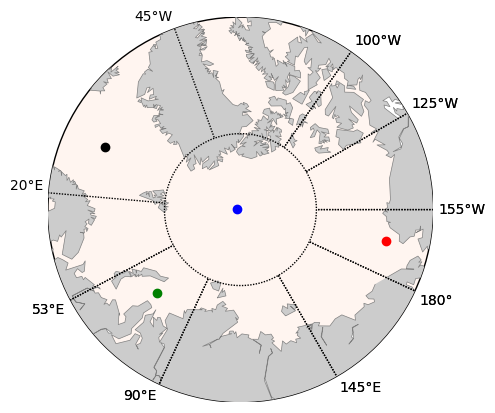

In [63]:
from mpl_toolkits.basemap import Basemap
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
m = Basemap(projection='npstere',round=True,
            boundinglat=65,
            lon_0=180+(-100+-30)/2.,resolution='c')
data, lon = add_cyclic_point(np.nanmean(ppC_ds.ppC_150m,axis=(0,1)), coord=ppC_ds.lon, axis=1)
x, y = m(*np.meshgrid(lon,ppC_ds.lat))
m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.get_cmap('Reds', 10))

x1, y1 = m(*np.meshgrid(ppC_ds.lon[180],ppC_ds.lat[160]))
m.plot(x1,y1,'o',color='k')

x1, y1 = m(*np.meshgrid(ppC_ds.lon[13],ppC_ds.lat[160]))
m.plot(x1,y1,'o',color='r')

x1, y1 = m(*np.meshgrid(ppC_ds.lon[200],ppC_ds.lat[179]))
m.plot(x1,y1,'o',color='b')

x1, y1 = m(*np.meshgrid(ppC_ds.lon[250],ppC_ds.lat[164]))
m.plot(x1,y1,'o',color='g')

m.drawmeridians((180,205), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((205,235), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((235,260), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((260,315), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((145,180), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((90,145), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((53,90), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((20,53), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawparallels((60,90), color='k', textcolor='k', 
                linewidth=1.0, zorder=None, dashes=[1, 1], 
                labels=[0, 0, 0, 0])
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)
m.plot
plt.show()

In [ ]:
x1, y1 = m(*np.meshgrid(ppC_ds.lon[180],ppC_ds.lat[160]))
m.plot(x1,y1,'o',color='k')

x1, y1 = m(*np.meshgrid(ppC_ds.lon[13],ppC_ds.lat[160]))
m.plot(x1,y1,'o',color='r')

x1, y1 = m(*np.meshgrid(ppC_ds.lon[200],ppC_ds.lat[179]))
m.plot(x1,y1,'o',color='b')

x1, y1 = m(*np.meshgrid(ppC_ds.lon[250],ppC_ds.lat[164]))
m.plot(x1,y1,'o',color='g')

## Find the lons and lats for each of the regions
1. Black dot = Nordic region [70.5$^o$N,0$^o$E]
2. red dot = Chukchi Sea [70.5$^o$N,167$^o$W]
3. Blue dot = Central Arctic [89.5$^o$N, 20$^o$E]
4. Green dot = Kara Sea [74.5$^o$N,70$^o$E ]

In [71]:
%%time
phytoC = np.stack([ppC_ds.ppC_150m, mp1C_ds.mp1C_150m, diazC_ds.diazC_150m, 
                               diat1C_ds.diat1C_150m, mp2C_ds.mp2C_150m, diat2C_ds.diat2C_150m, 
                               mp3C_ds.mp3C_150m, diat3C_ds.diat3C_150m, mp4C_ds.mp4C_150m])

phytoC_avg = np.nanmean(phytoC, axis =1) # average through the 62 years

		NC4_inq_var_all: ncid 0xd0000 varid 4
		NC4_inq_var_all: ncid 0xd0000 varid 4
		NC4_inq_dim: ncid 0xd0000 dimid 0
		NC4_inq_dim: ncid 0xd0000 dimid 3
		NC4_inq_dim: ncid 0xd0000 dimid 2
		NC4_inq_dim: ncid 0xd0000 dimid 1
		NC4_inq_dim: ncid 0xd0000 dimid 0
			nc4_find_dim_len: grp->name / dimid 0
		NC4_inq_dim: ncid 0xd0000 dimid 3
		NC4_inq_dim: ncid 0xd0000 dimid 2
		NC4_inq_dim: ncid 0xd0000 dimid 1
		NC4_inq_var_all: ncid 0xd0000 varid 4
		NC4_inq_var_all: ncid 0xd0000 varid 4
		NC4_inq_dim: ncid 0xd0000 dimid 0
		NC4_inq_dim: ncid 0xd0000 dimid 3
		NC4_inq_dim: ncid 0xd0000 dimid 2
		NC4_inq_dim: ncid 0xd0000 dimid 1
		NC4_inq_var_all: ncid 0xd0000 varid 4
		NC4_inq_var_all: ncid 0xd0000 varid 4
		NC4_inq_dim: ncid 0xd0000 dimid 0
		NC4_inq_dim: ncid 0xd0000 dimid 3
		NC4_inq_dim: ncid 0xd0000 dimid 2
		NC4_inq_dim: ncid 0xd0000 dimid 1
		NC4_inq_var_all: ncid 0xd0000 varid 4
			NC4_get_vars: var->hdr.name ppC_150m mem_nc_type 6
		NC4_inq_dim: ncid 0xd0000 dimid 0
			nc4_find_d

CPU times: user 5.84 s, sys: 21.9 s, total: 27.8 s
Wall time: 1min 25s


In [72]:
%%time
zooC = np.stack([zoo1C_ds.zoo1C_150m, zoo2C_ds.zoo2C_150m, zoo3C_ds.zoo3C_150m, 
                               zoo4C_ds.zoo4C_150m, zoo5C_ds.zoo5C_150m, zoo6C_ds.zoo6C_150m])
zooC_avg = np.nanmean(zooC, axis =1) # average through the 62 years

		NC4_inq_var_all: ncid 0x160000 varid 4
		NC4_inq_var_all: ncid 0x160000 varid 4
		NC4_inq_dim: ncid 0x160000 dimid 0
		NC4_inq_dim: ncid 0x160000 dimid 3
		NC4_inq_dim: ncid 0x160000 dimid 2
		NC4_inq_dim: ncid 0x160000 dimid 1
		NC4_inq_dim: ncid 0x160000 dimid 0
			nc4_find_dim_len: grp->name / dimid 0
		NC4_inq_dim: ncid 0x160000 dimid 3
		NC4_inq_dim: ncid 0x160000 dimid 2
		NC4_inq_dim: ncid 0x160000 dimid 1
		NC4_inq_var_all: ncid 0x160000 varid 4
		NC4_inq_var_all: ncid 0x160000 varid 4
		NC4_inq_dim: ncid 0x160000 dimid 0
		NC4_inq_dim: ncid 0x160000 dimid 3
		NC4_inq_dim: ncid 0x160000 dimid 2
		NC4_inq_dim: ncid 0x160000 dimid 1
		NC4_inq_var_all: ncid 0x160000 varid 4
		NC4_inq_var_all: ncid 0x160000 varid 4
		NC4_inq_dim: ncid 0x160000 dimid 0
		NC4_inq_dim: ncid 0x160000 dimid 3
		NC4_inq_dim: ncid 0x160000 dimid 2
		NC4_inq_dim: ncid 0x160000 dimid 1
		NC4_inq_var_all: ncid 0x160000 varid 4
			NC4_get_vars: var->hdr.name zoo1C_150m mem_nc_type 6
		NC4_inq_dim: ncid 0x16

CPU times: user 2.57 s, sys: 5.3 s, total: 7.87 s
Wall time: 12 s


In [73]:
phytoC.shape

(9, 62, 12, 180, 360)

In [74]:
phytoC_avg.shape

(9, 12, 180, 360)

In [75]:
k_phyto   = phytoC_avg[:,:,160,180]/1000 # mg/m^3
b_phyto   = phytoC_avg[:,:,179,200]/1000 # mg/m^3
r_phyto   = phytoC_avg[:,:,160,13]/1000 # mg/m^3
g_phyto   = phytoC_avg[:,:,164,250]/1000 # mg/m^3

k_zoo     = zooC_avg[:,:,160,180]/1000 # mg/m^3
b_zoo     = zooC_avg[:,:,179,200]/1000 # mg/m^3
r_zoo     = zooC_avg[:,:,160,13]/1000 # mg/m^3
g_zoo     = zooC_avg[:,:,164,250]/1000 # mg/m^3

k_phyto       = np.mean(phytoC_avg[:,:,158:162,158:162],axis=(2,3))/1000 # mg/m^3
b_phyto     = np.mean(phytoC_avg[:,:,172:177,198:202],axis=(2,3))/1000 # mg/m^3
r_phyto     = np.mean(phytoC_avg[:,:,158:162,198:202],axis=(2,3))/1000 # mg/m^3
g_phyto   = np.mean(phytoC_avg[:,:,163:167,248:252],axis=(2,3))/1000 # mg/m^3

k_zoo       = np.mean(zooC_avg[:,:,158:162,158:162],axis=(2,3))/1000 # mg/m^3
b_zoo     = np.mean(zooC_avg[:,:,172:177,198:202],axis=(2,3))/1000 # mg/m^3
r_zoo     = np.mean(zooC_avg[:,:,158:162,198:202],axis=(2,3))/1000 # mg/m^3
g_zoo   = np.mean(zooC_avg[:,:,163:167,248:252],axis=(2,3))/1000 # mg/m^3

In [76]:
month = np.arange(1, 13, 1)
month.shape

(12,)

In [77]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 30,
        }

## Kara Sea [74.5$^o$N,70$^o$E ], Green region

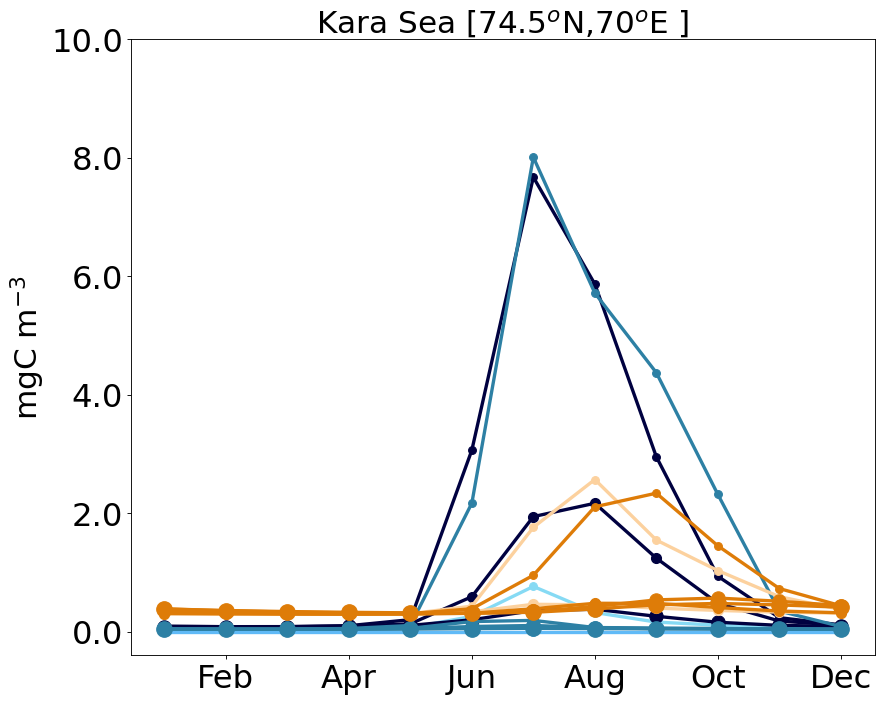

In [118]:
fig = figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
pylab.plot(month,g_phyto[0,:], '-o', color='#86daf4',markersize=7,linewidth = 3,label='picoplankton')
pylab.plot(month,g_phyto[3,:], '-o', color='#000140',markersize=7,linewidth = 3,label='diatom 1')
pylab.plot(month,g_phyto[5,:], '-o', color='#000140',markersize=9,linewidth = 3,label='diatom 2 ')
pylab.plot(month,g_phyto[7,:], '-o', color='#000140',markersize=12,linewidth = 3,label='diatom 3 ')
pylab.plot(month,g_phyto[2,:], '-o', color='#60baf7',markersize=7,linewidth = 3,label='diazotroph ')
pylab.plot(month,g_phyto[1,:], '-o', color='#2d80a4',markersize=7,linewidth = 3,label='mixed phytoplankton 1 ')
pylab.plot(month,g_phyto[4,:], '-o', color='#2d80a4',markersize=9,linewidth = 3,label='mixed phytoplankton 2 ')
pylab.plot(month,g_phyto[6,:], '-o', color='#2d80a4',markersize=12,linewidth = 3,label='mixed phytoplankton 3 ')
pylab.plot(month,g_phyto[8,:], '-o', color='#2d80a4',markersize=14,linewidth = 3,label='mixed phytoplankton 4 ')
pylab.plot(month,g_zoo[0,:], '-o', color='#FCD19E',markersize=7,linewidth = 3,label='micozooplankton 1')
pylab.plot(month,g_zoo[1,:], '-o', color='#FCD19E',markersize=9,linewidth = 3,label='micozooplankton 2')
pylab.plot(month,g_zoo[2,:], '-o', color='#DE7C08',markersize=7,linewidth = 3,label='mesozooplankton 1 ')
pylab.plot(month,g_zoo[3,:], '-o', color='#DE7C08',markersize=9,linewidth = 3,label='mesozooplankton 2 ')
pylab.plot(month,g_zoo[4,:], '-o', color='#DE7C08',markersize=12,linewidth = 3,label='mesozooplankton 3 ')
pylab.plot(month,g_zoo[5,:], '-o', color='#DE7C08',markersize=14,linewidth = 3,label='mesozooplankton 4 ')
#pylab.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
pylab.ylabel('mgC m$^{-3}$', fontsize=28)
plt.ylim(top=10)
pylab.title('Kara Sea [74.5$^o$N,70$^o$E ]', fontsize=28)
from matplotlib.pyplot import gca
a = gca()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off
a.set_yticklabels(a.get_yticks())
a.set_xticklabels(['jan','Feb','Apr','Jun','Aug','Oct','Dec'])
plt.yticks(fontsize= 29,);plt.xticks(fontsize= 29);
pylab.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}kara_sea_5deg_seasonal_succession_62yravg.png',dpi=600, bbox_inches='tight')

##  Central Arctic [89.5$^o$N, 20$^o$E], blue region

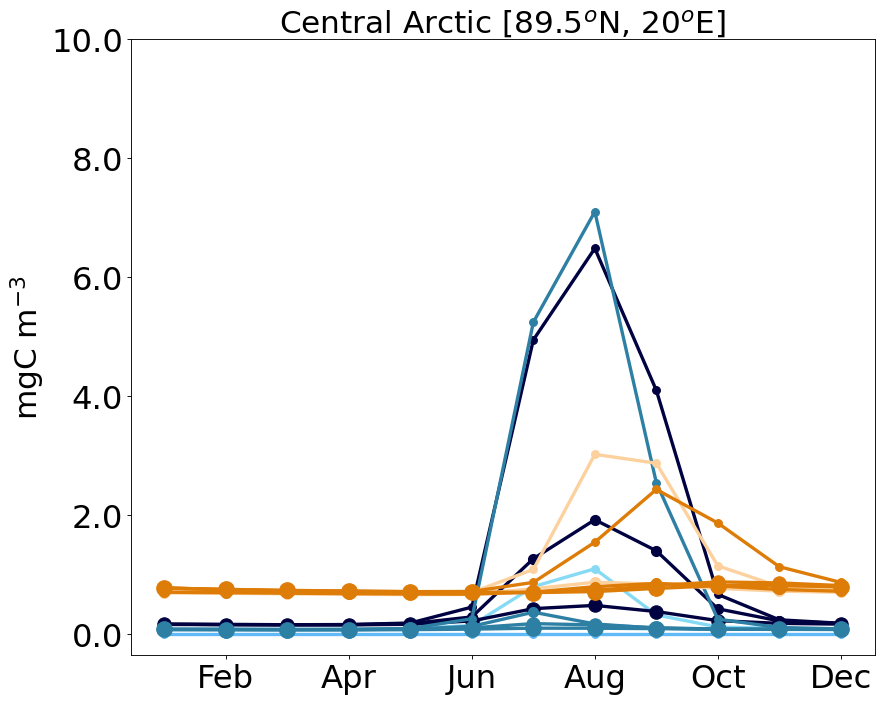

In [117]:
fig = figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
pylab.plot(month,b_phyto[0,:], '-o', color='#86daf4',markersize=7,linewidth = 3,label='picoplankton')
pylab.plot(month,b_phyto[3,:], '-o', color='#000140',markersize=7,linewidth = 3,label='diatom 1')
pylab.plot(month,b_phyto[5,:], '-o', color='#000140',markersize=9,linewidth = 3,label='diatom 2 ')
pylab.plot(month,b_phyto[7,:], '-o', color='#000140',markersize=12,linewidth = 3,label='diatom 3 ')
pylab.plot(month,b_phyto[2,:], '-o', color='#60baf7',markersize=7,linewidth = 3,label='diazotroph ')
pylab.plot(month,b_phyto[1,:], '-o', color='#2d80a4',markersize=7,linewidth = 3,label='mixed phytoplankton 1 ')
pylab.plot(month,b_phyto[4,:], '-o', color='#2d80a4',markersize=9,linewidth = 3,label='mixed phytoplankton 2 ')
pylab.plot(month,b_phyto[6,:], '-o', color='#2d80a4',markersize=12,linewidth = 3,label='mixed phytoplankton 3 ')
pylab.plot(month,b_phyto[8,:], '-o', color='#2d80a4',markersize=14,linewidth = 3,label='mixed phytoplankton 4 ')
pylab.plot(month,b_zoo[0,:], '-o', color='#FCD19E',markersize=7,linewidth = 3,label='micozooplankton 1')
pylab.plot(month,b_zoo[1,:], '-o', color='#FCD19E',markersize=9,linewidth = 3,label='micozooplankton 2')
pylab.plot(month,b_zoo[2,:], '-o', color='#DE7C08',markersize=7,linewidth = 3,label='mesozooplankton 1 ')
pylab.plot(month,b_zoo[3,:], '-o', color='#DE7C08',markersize=9,linewidth = 3,label='mesozooplankton 2 ')
pylab.plot(month,b_zoo[4,:], '-o', color='#DE7C08',markersize=12,linewidth = 3,label='mesozooplankton 3 ')
pylab.plot(month,b_zoo[5,:], '-o', color='#DE7C08',markersize=14,linewidth = 3,label='mesozooplankton 4 ')
#pylab.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
pylab.ylabel('mgC m$^{-3}$', fontsize=28)
plt.ylim(top=10)
pylab.title('Central Arctic [89.5$^o$N, 20$^o$E]', fontsize=28)
from matplotlib.pyplot import gca
a = gca()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off
a.set_yticklabels(a.get_yticks())
a.set_xticklabels(['jan','Feb','Apr','Jun','Aug','Oct','Dec'])
plt.yticks(fontsize= 29,);plt.xticks(fontsize= 29);
pylab.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}central_arctic_5deg_seasonal_succession_62yravg.png',dpi=600, bbox_inches='tight')

## Chukchi Sea [70.5$^o$N,167$^o$W], Red region

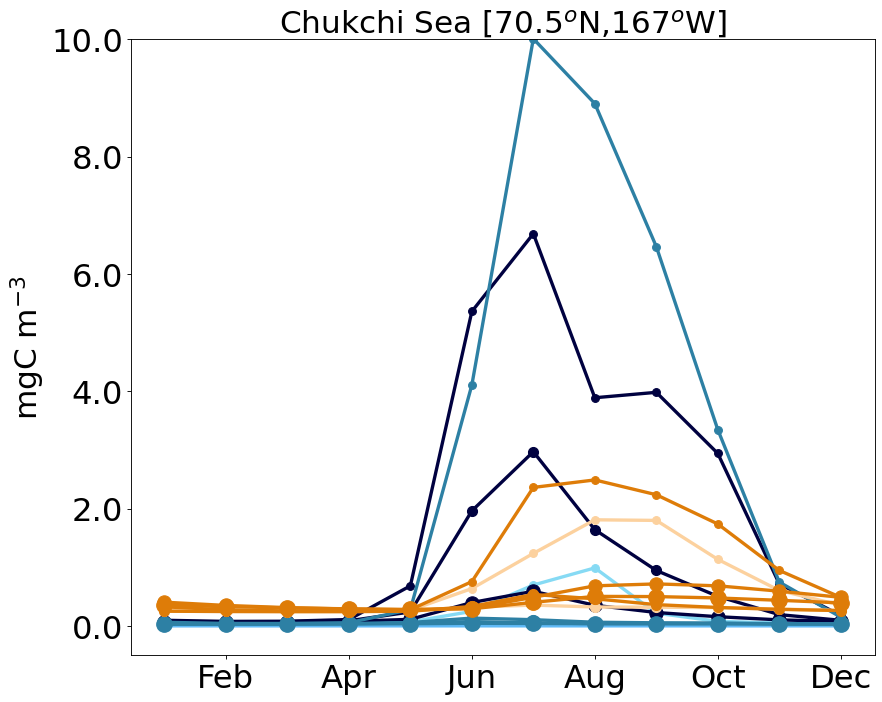

In [116]:
fig = figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
pylab.plot(month,r_phyto[0,:], '-o', color='#86daf4',markersize=7,linewidth = 3,label='picoplankton')
pylab.plot(month,r_phyto[3,:], '-o', color='#000140',markersize=7,linewidth = 3,label='diatom 1')
pylab.plot(month,r_phyto[5,:], '-o', color='#000140',markersize=9,linewidth = 3,label='diatom 2 ')
pylab.plot(month,r_phyto[7,:], '-o', color='#000140',markersize=12,linewidth = 3,label='diatom 3 ')
pylab.plot(month,r_phyto[2,:], '-o', color='#60baf7',markersize=7,linewidth = 3,label='diazotroph ')
pylab.plot(month,r_phyto[1,:], '-o', color='#2d80a4',markersize=7,linewidth = 3,label='mixed phytoplankton 1 ')
pylab.plot(month,r_phyto[4,:], '-o', color='#2d80a4',markersize=9,linewidth = 3,label='mixed phytoplankton 2 ')
pylab.plot(month,r_phyto[6,:], '-o', color='#2d80a4',markersize=12,linewidth = 3,label='mixed phytoplankton 3 ')
pylab.plot(month,r_phyto[8,:], '-o', color='#2d80a4',markersize=14,linewidth = 3,label='mixed phytoplankton 4 ')
pylab.plot(month,r_zoo[0,:], '-o', color='#FCD19E',markersize=7,linewidth = 3,label='micozooplankton 1')
pylab.plot(month,r_zoo[1,:], '-o', color='#FCD19E',markersize=9,linewidth = 3,label='micozooplankton 2')
pylab.plot(month,r_zoo[2,:], '-o', color='#DE7C08',markersize=7,linewidth = 3,label='mesozooplankton 1 ')
pylab.plot(month,r_zoo[3,:], '-o', color='#DE7C08',markersize=9,linewidth = 3,label='mesozooplankton 2 ')
pylab.plot(month,r_zoo[4,:], '-o', color='#DE7C08',markersize=12,linewidth = 3,label='mesozooplankton 3 ')
pylab.plot(month,r_zoo[5,:], '-o', color='#DE7C08',markersize=14,linewidth = 3,label='mesozooplankton 4 ')
#pylab.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
pylab.ylabel('mgC m$^{-3}$', fontsize=28)
plt.ylim(top=10)
pylab.title('Chukchi Sea [70.5$^o$N,167$^o$W]', fontsize=28)
from matplotlib.pyplot import gca
a = gca()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off
a.set_yticklabels(a.get_yticks())
a.set_xticklabels(['jan','Feb','Apr','Jun','Aug','Oct','Dec'])
plt.yticks(fontsize= 29,);plt.xticks(fontsize= 29);
pylab.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}Chukchi_5deg_seasonal_succession_62yravg.png',dpi=600, bbox_inches='tight')

## Nordic sea [70.5$^o$N,0$^o$E], black region

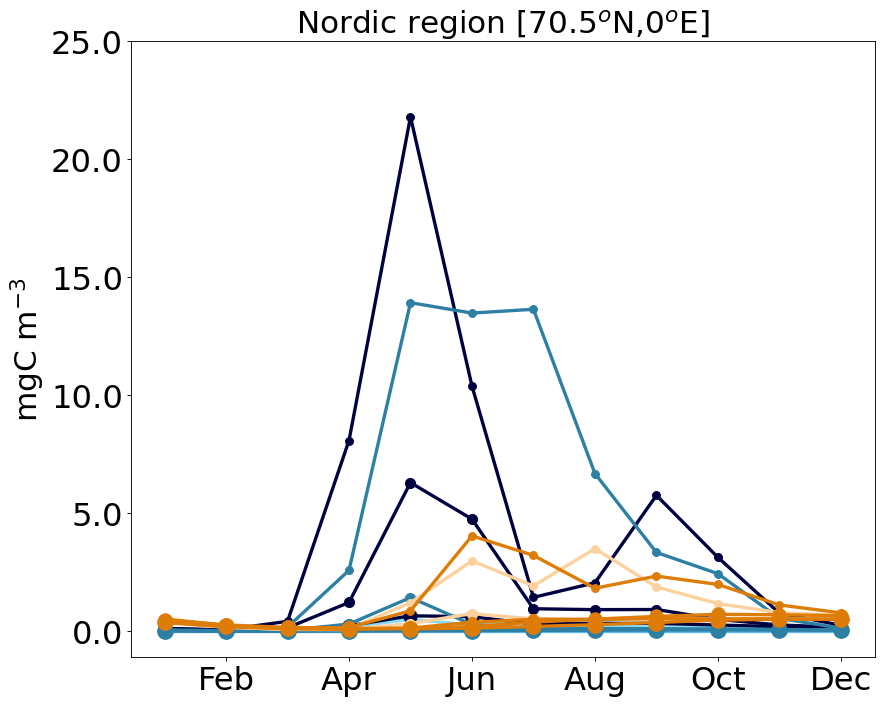

In [115]:
fig = figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
pylab.plot(month,k_phyto[0,:], '-o', color='#86daf4',markersize=7,linewidth = 3,label='picoplankton')
pylab.plot(month,k_phyto[3,:], '-o', color='#000140',markersize=7,linewidth = 3,label='diatom 1')
pylab.plot(month,k_phyto[5,:], '-o', color='#000140',markersize=9,linewidth = 3,label='diatom 2 ')
pylab.plot(month,k_phyto[7,:], '-o', color='#000140',markersize=12,linewidth = 3,label='diatom 3 ')
pylab.plot(month,k_phyto[2,:], '-o', color='#60baf7',markersize=7,linewidth = 3,label='diazotroph ')
pylab.plot(month,k_phyto[1,:], '-o', color='#2d80a4',markersize=7,linewidth = 3,label='mixed phytoplankton 1 ')
pylab.plot(month,k_phyto[4,:], '-o', color='#2d80a4',markersize=9,linewidth = 3,label='mixed phytoplankton 2 ')
pylab.plot(month,k_phyto[6,:], '-o', color='#2d80a4',markersize=12,linewidth = 3,label='mixed phytoplankton 3 ')
pylab.plot(month,k_phyto[8,:], '-o', color='#2d80a4',markersize=14,linewidth = 3,label='mixed phytoplankton 4 ')
pylab.plot(month,k_zoo[0,:], '-o', color='#FCD19E',markersize=7,linewidth = 3,label='micozooplankton 1')
pylab.plot(month,k_zoo[1,:], '-o', color='#FCD19E',markersize=9,linewidth = 3,label='micozooplankton 2')
pylab.plot(month,k_zoo[2,:], '-o', color='#DE7C08',markersize=7,linewidth = 3,label='mesozooplankton 1 ')
pylab.plot(month,k_zoo[3,:], '-o', color='#DE7C08',markersize=9,linewidth = 3,label='mesozooplankton 2 ')
pylab.plot(month,k_zoo[4,:], '-o', color='#DE7C08',markersize=12,linewidth = 3,label='mesozooplankton 3 ')
pylab.plot(month,k_zoo[5,:], '-o', color='#DE7C08',markersize=14,linewidth = 3,label='mesozooplankton 4 ')
#pylab.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
pylab.ylabel('mgC m$^{-3}$', fontsize=28)
plt.ylim(top=25)
pylab.title('Nordic region [70.5$^o$N,0$^o$E]', fontsize=28)
from matplotlib.pyplot import gca
a = gca()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off
a.set_yticklabels(a.get_yticks())
a.set_xticklabels(['jan','Feb','Apr','Jun','Aug','Oct','Dec'])
plt.yticks(fontsize= 29,);plt.xticks(fontsize= 29);
pylab.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}nordic_5deg_seasonal_succession_62yravg.png',dpi=600, bbox_inches='tight')

## Now check differences between warm and cold years?

## Regrid the temperature, ice fraction and nutrient files to make them easier to use: 
`TEMP`
ncatted -a coordinates,TEMP,c,c,"TLONG TLAT" temp_ds_inter_surface.nc
cdo remapbil,r360x180 -selname,TEMP temp_ds_inter_surface.nc temp_ds_inter_surface_regrid.nc
cdo sellonlatbox,-180,180,-89.5,89.5 temp_ds_inter_surface_regrid.nc regrid_temp_ds_inter_surface.nc

`ECOSYS_IFRAC`
ncatted -a coordinates,ECOSYS_IFRAC,c,c,"TLONG TLAT" ECOSYS_IFRAC_ds_inter_surface.nc
cdo remapbil,r360x180 -selname,ECOSYS_IFRAC ECOSYS_IFRAC_ds_inter_surface.nc ECOSYS_IFRAC_ds_inter_surface_regrid.nc
cdo sellonlatbox,-180,180,-89.5,89.5 ECOSYS_IFRAC_ds_inter_surface_regrid.nc regrid_ECOSYS_IFRAC_ds_inter_surface.nc

`NO3`
ncatted -a coordinates,NO3,c,c,"TLONG TLAT" NO3_ds_inter_surface.nc
cdo remapbil,r360x180 -selname,NO3 NO3_ds_inter_surface.nc NO3_ds_inter_surface_regrid.nc
cdo sellonlatbox,-180,180,-89.5,89.5 NO3_ds_inter_surface_regrid.nc regrid_NO3_ds_inter_surface.nc


## High vs Low temperature years 

In [23]:
%%time
temp_ds_inter = xr.open_mfdataset('/glade/u/home/gabyn/scratch/SPECTRA/nc_files/regrid/regrid_temp_ds_inter_surface.nc');

CPU times: user 10.3 ms, sys: 15.2 ms, total: 25.4 ms
Wall time: 216 ms


	NC4_open: path /glade/u/home/gabyn/scratch/SPECTRA/nc_files/regrid/regrid_temp_ds_inter_surface.nc mode 4096 params 0
	HDF5 error messages turned on.
			nc4_open_file: path /glade/u/home/gabyn/scratch/SPECTRA/nc_files/regrid/regrid_temp_ds_inter_surface.nc mode 4096
			nc4_grp_list_add: name / 
			nc4_rec_read_metadata: grp->hdr.name /
			found dataset time
			found dataset lon
			found dataset lat
			found dataset month
			found dataset TEMP
ERROR: Invalid _NCProperties attribute
		*** NetCDF-4 Internal Metadata: int_ncid 0x1c0000 ext_ncid 0x1c0000
		FILE - path: /glade/u/home/gabyn/scratch/SPECTRA/nc_files/regrid/regrid_temp_ds_inter_surface.nc cmode: 0x1008 parallel: 0 redef: 0 fill_mode: 0 no_write: 1 next_nc_grpid: 1
		 GROUP - / nc_grpid: 0 nvars: 5 natts: 0
		 DIMENSION - dimid: 0 name: time len: 62 unlimited: 1
		 DIMENSION - dimid: 1 name: lon len: 360 unlimited: 0
		 DIMENSION - dimid: 2 name: lat len: 180 unlimited: 0
		 DIMENSION - dimid: 3 name: month len: 12 unlimited: 0

In [24]:
## Calculate climatology for each grid cell
temp_ao_clim = np.nanmean(temp_ds_inter.TEMP,axis=0) # Size (180,360)
temp_ds = np.array(temp_ds_inter.TEMP)

		NC4_inq_var_all: ncid 0x1c0000 varid 4
		NC4_inq_var_all: ncid 0x1c0000 varid 4
		NC4_inq_dim: ncid 0x1c0000 dimid 0
		NC4_inq_dim: ncid 0x1c0000 dimid 3
		NC4_inq_dim: ncid 0x1c0000 dimid 2
		NC4_inq_dim: ncid 0x1c0000 dimid 1
		NC4_inq_dim: ncid 0x1c0000 dimid 0
			nc4_find_dim_len: grp->name / dimid 0
		NC4_inq_dim: ncid 0x1c0000 dimid 3
		NC4_inq_dim: ncid 0x1c0000 dimid 2
		NC4_inq_dim: ncid 0x1c0000 dimid 1
		NC4_inq_var_all: ncid 0x1c0000 varid 4
		NC4_inq_var_all: ncid 0x1c0000 varid 4
		NC4_inq_dim: ncid 0x1c0000 dimid 0
		NC4_inq_dim: ncid 0x1c0000 dimid 3
		NC4_inq_dim: ncid 0x1c0000 dimid 2
		NC4_inq_dim: ncid 0x1c0000 dimid 1
		NC4_inq_var_all: ncid 0x1c0000 varid 4
		NC4_inq_var_all: ncid 0x1c0000 varid 4
		NC4_inq_dim: ncid 0x1c0000 dimid 0
		NC4_inq_dim: ncid 0x1c0000 dimid 3
		NC4_inq_dim: ncid 0x1c0000 dimid 2
		NC4_inq_dim: ncid 0x1c0000 dimid 1
		NC4_inq_var_all: ncid 0x1c0000 varid 4
			NC4_get_vars: var->hdr.name TEMP mem_nc_type 6
		NC4_inq_dim: ncid 0x1c0000 d

In [25]:
%%time
# For every grid cell in the Arctic Ocean 
# Create empty arrays filled with NaN's 
temp_arctic_anom = np.empty([62,12,180,360]) ; temp_arctic_anom[:] = np.nan

# Loop through the latitudes and longitudes to calculate anomalies and error values. 
for latitude in np.arange(0,180,1):
    for longitude in np.arange(0,360,1):
        temp_arctic_anom[:,:,latitude,longitude] = temp_ds[:,:,latitude,longitude]-temp_ao_clim[:,latitude,longitude]

CPU times: user 636 ms, sys: 133 ms, total: 769 ms
Wall time: 794 ms


In [26]:
%%time
temp_arctic_anom_yearly = np.nanmean(temp_arctic_anom,axis=1) # size is now (62,384,320)

# Create empty arrays filled with NaN's 
pcen_90 = np.empty([180,360]) ; pcen_90[:] = np.nan
pcen_10 = np.empty([180,360]) ; pcen_10[:] = np.nan

# Loop through the latitudes and longitudes to calculate anomalies and error values. 
for latitude in np.arange(0,180,1):
    for longitude in np.arange(0,360,1):
    # index of array entry nearest to percentile value
        pcen_90[latitude,longitude]=np.nanpercentile(temp_arctic_anom_yearly[:,latitude,longitude],90,interpolation='nearest')
        pcen_10[latitude,longitude]=np.nanpercentile(temp_arctic_anom_yearly[:,latitude,longitude],10,interpolation='nearest')

CPU times: user 5.7 s, sys: 232 ms, total: 5.93 s
Wall time: 5.99 s


In [27]:
%%time
# Python3 code to demonstrate working of
# Creating Multidimensional dictionary
# Using defaultdict()
from collections import defaultdict
 
# Utility function to create dictionary
def multi_dict(K, type):
    if K == 1:
        return defaultdict(type)
    else:
        return defaultdict(lambda: multi_dict(K-1, type))
 
# Initialize dictionary
low_temp_years_arctic = {}
high_temp_years_arctic = {}
 
# Using defaultdict()
# Creating Multidimensional dictionary
# calling function
low_temp_years_arctic = multi_dict(2, int)
high_temp_years_arctic = multi_dict(2, int)
for latitude in np.arange(0,180,1):
    for longitude in np.arange(0,360,1):
        low_temp_years_arctic[latitude][longitude] = np.where(temp_arctic_anom_yearly[:,latitude,longitude] < pcen_10[latitude,longitude])
        high_temp_years_arctic[latitude][longitude] = np.where(temp_arctic_anom_yearly[:,latitude,longitude] > pcen_90[latitude,longitude])

CPU times: user 429 ms, sys: 17.7 ms, total: 446 ms
Wall time: 874 ms


In [48]:
# Loop through the latitudes and longitudes to calculate anomalies and error values. 
cold_years_phytoC = np.empty([9,12,180,360]) ; cold_years_phytoC[:] = np.nan
warm_years_phytoC = np.empty([9,12,180,360]) ; warm_years_phytoC[:] = np.nan


cold_years_zooC = np.empty([6,12,180,360]) ; cold_years_zooC[:] = np.nan
warm_years_zooC = np.empty([6,12,180,360]) ; warm_years_zooC[:] = np.nan

for latitude in np.arange(0,180,1):
    for longitude in np.arange(0,360,1):
        for phyto in np.arange(0,9,1):
            cold_years_phytoC[phyto,:,latitude,longitude] = np.nanmean(phytoC[phyto,low_temp_years_arctic[latitude][longitude],:,latitude,longitude],axis=(0,1))
            warm_years_phytoC[phyto,:,latitude,longitude] = np.nanmean(phytoC[phyto,high_temp_years_arctic[latitude][longitude],:,latitude,longitude],axis=(0,1)) 
        for zoo in np.arange(0,6,1):
            cold_years_zooC[zoo,:,latitude,longitude] = np.nanmean(zooC[zoo,low_temp_years_arctic[latitude][longitude],:,latitude,longitude],axis=(0,1))
            warm_years_zooC[zoo,:,latitude,longitude] = np.nanmean(zooC[zoo,high_temp_years_arctic[latitude][longitude],:,latitude,longitude],axis=(0,1)) 
 

In [89]:
## Cold years 
# Phytoplankton 
k_phyto_cold = cold_years_phytoC[:,:,160,180]/1000 # mg/m^3
b_phyto_cold = cold_years_phytoC[:,:,179,200]/1000 # mg/m^3
r_phyto_cold = cold_years_phytoC[:,:,160,13]/1000 # mg/m^3
g_phyto_cold = cold_years_phytoC[:,:,164,250]/1000 # mg/m^3

# Zooplankton 
k_zoo_cold   = cold_years_zooC[:,:,160,180]/1000 # mg/m^3
b_zoo_cold   = cold_years_zooC[:,:,179,200]/1000 # mg/m^3
r_zoo_cold   = cold_years_zooC[:,:,160,13]/1000 # mg/m^3
g_zoo_cold   = cold_years_zooC[:,:,164,250]/1000 # mg/m^3

# Warm Years 
# Phytoplankton 
k_phyto_warm = warm_years_phytoC[:,:,160,180]/1000 # mg/m^3
b_phyto_warm = warm_years_phytoC[:,:,179,200]/1000 # mg/m^3
r_phyto_warm = warm_years_phytoC[:,:,160,13]/1000 # mg/m^3
g_phyto_warm = warm_years_phytoC[:,:,164,250]/1000 # mg/m^3

# Zooplankton 
k_zoo_warm   = warm_years_zooC[:,:,160,180]/1000 # mg/m^3
b_zoo_warm   = warm_years_zooC[:,:,179,200]/1000 # mg/m^3
r_zoo_warm   = warm_years_zooC[:,:,160,13]/1000 # mg/m^3
g_zoo_warm   = warm_years_zooC[:,:,164,250]/1000 # mg/m^3

## COLD YEARS - Nordic Region

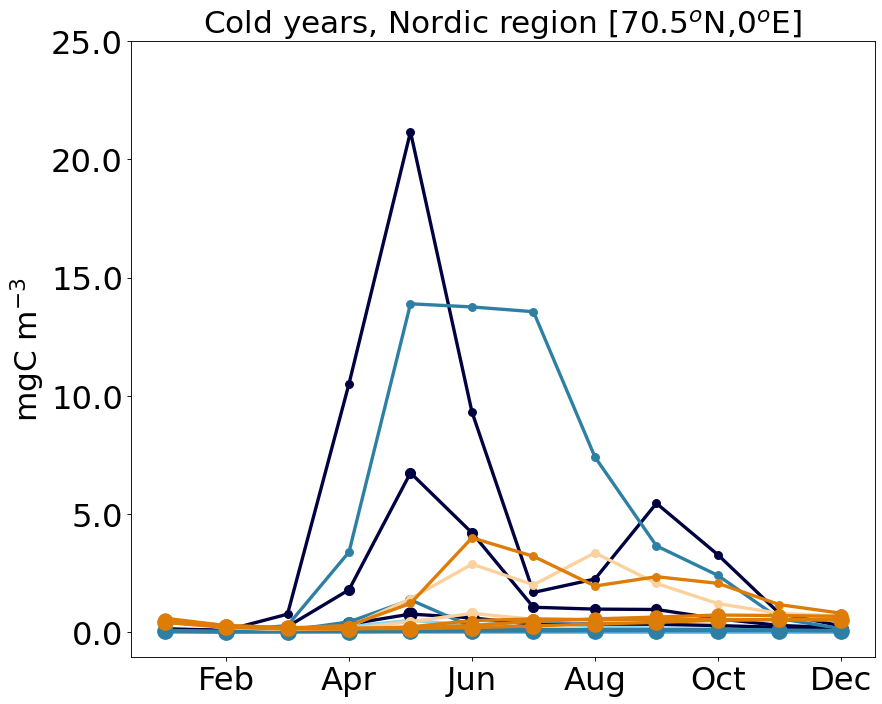

In [114]:
fig = figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
pylab.plot(month,k_phyto_cold[0,:], '-o', color='#86daf4',markersize=7,linewidth = 3,label='picoplankton')
pylab.plot(month,k_phyto_cold[3,:], '-o', color='#000140',markersize=7,linewidth = 3,label='diatom 1')
pylab.plot(month,k_phyto_cold[5,:], '-o', color='#000140',markersize=9,linewidth = 3,label='diatom 2 ')
pylab.plot(month,k_phyto_cold[7,:], '-o', color='#000140',markersize=12,linewidth = 3,label='diatom 3 ')
pylab.plot(month,k_phyto_cold[2,:], '-o', color='#60baf7',markersize=7,linewidth = 3,label='diazotroph ')
pylab.plot(month,k_phyto_cold[1,:], '-o', color='#2d80a4',markersize=7,linewidth = 3,label='mixed phytoplankton 1 ')
pylab.plot(month,k_phyto_cold[4,:], '-o', color='#2d80a4',markersize=9,linewidth = 3,label='mixed phytoplankton 2 ')
pylab.plot(month,k_phyto_cold[6,:], '-o', color='#2d80a4',markersize=12,linewidth = 3,label='mixed phytoplankton 3 ')
pylab.plot(month,k_phyto_cold[8,:], '-o', color='#2d80a4',markersize=14,linewidth = 3,label='mixed phytoplankton 4 ')
pylab.plot(month,k_zoo_cold[0,:], '-o', color='#FCD19E',markersize=7,linewidth = 3,label='micozooplankton 1')
pylab.plot(month,k_zoo_cold[1,:], '-o', color='#FCD19E',markersize=9,linewidth = 3,label='micozooplankton 2')
pylab.plot(month,k_zoo_cold[2,:], '-o', color='#DE7C08',markersize=7,linewidth = 3,label='mesozooplankton 1 ')
pylab.plot(month,k_zoo_cold[3,:], '-o', color='#DE7C08',markersize=9,linewidth = 3,label='mesozooplankton 2 ')
pylab.plot(month,k_zoo_cold[4,:], '-o', color='#DE7C08',markersize=12,linewidth = 3,label='mesozooplankton 3 ')
pylab.plot(month,k_zoo_cold[5,:], '-o', color='#DE7C08',markersize=14,linewidth = 3,label='mesozooplankton 4 ')
#pylab.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
pylab.ylabel('mgC m$^{-3}$', fontsize=28)
plt.ylim(top=25)
pylab.title('Cold years, Nordic region [70.5$^o$N,0$^o$E]', fontsize=28)
from matplotlib.pyplot import gca
a = gca()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off
a.set_yticklabels(a.get_yticks())
a.set_xticklabels(['jan','Feb','Apr','Jun','Aug','Oct','Dec'])
plt.yticks(fontsize= 29,);plt.xticks(fontsize= 29);
pylab.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
env_type='cold_years'
fig.savefig(f'{file}nordic_5deg_seasonal_succession_62yravg_{env_type}.png',dpi=600, bbox_inches='tight')

## WARM YEARS - Nordic Region

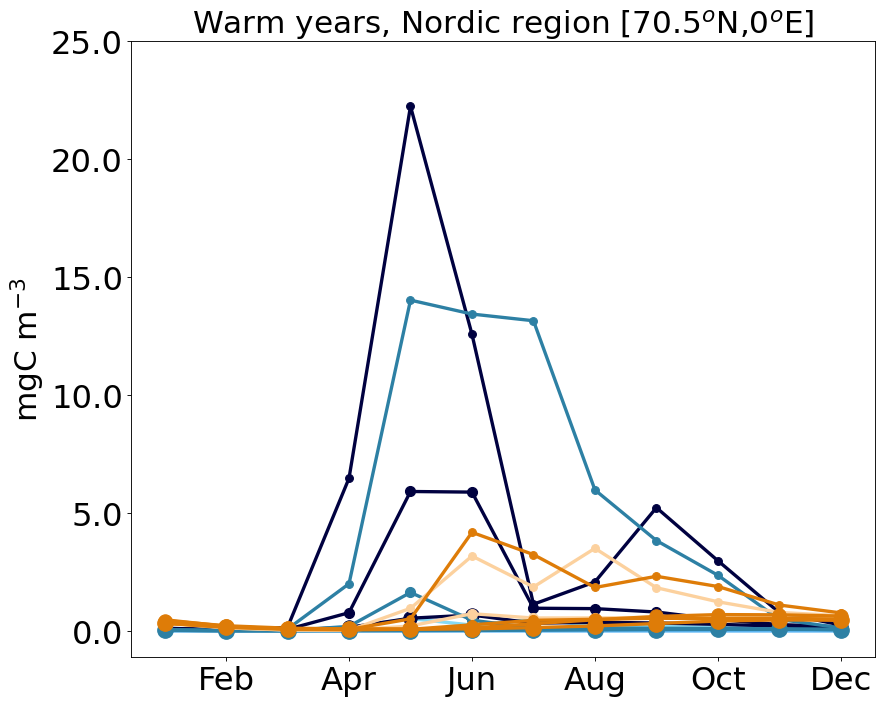

In [113]:
fig = figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
pylab.plot(month,k_phyto_warm[0,:], '-o', color='#86daf4',markersize=7,linewidth = 3,label='picoplankton')
pylab.plot(month,k_phyto_warm[3,:], '-o', color='#000140',markersize=7,linewidth = 3,label='diatom 1')
pylab.plot(month,k_phyto_warm[5,:], '-o', color='#000140',markersize=9,linewidth = 3,label='diatom 2 ')
pylab.plot(month,k_phyto_warm[7,:], '-o', color='#000140',markersize=12,linewidth = 3,label='diatom 3 ')
pylab.plot(month,k_phyto_warm[2,:], '-o', color='#60baf7',markersize=7,linewidth = 3,label='diazotroph ')
pylab.plot(month,k_phyto_warm[1,:], '-o', color='#2d80a4',markersize=7,linewidth = 3,label='mixed phytoplankton 1 ')
pylab.plot(month,k_phyto_warm[4,:], '-o', color='#2d80a4',markersize=9,linewidth = 3,label='mixed phytoplankton 2 ')
pylab.plot(month,k_phyto_warm[6,:], '-o', color='#2d80a4',markersize=12,linewidth = 3,label='mixed phytoplankton 3 ')
pylab.plot(month,k_phyto_warm[8,:], '-o', color='#2d80a4',markersize=14,linewidth = 3,label='mixed phytoplankton 4 ')
pylab.plot(month,k_zoo_warm[0,:], '-o', color='#FCD19E',markersize=7,linewidth = 3,label='micozooplankton 1')
pylab.plot(month,k_zoo_warm[1,:], '-o', color='#FCD19E',markersize=9,linewidth = 3,label='micozooplankton 2')
pylab.plot(month,k_zoo_warm[2,:], '-o', color='#DE7C08',markersize=7,linewidth = 3,label='mesozooplankton 1 ')
pylab.plot(month,k_zoo_warm[3,:], '-o', color='#DE7C08',markersize=9,linewidth = 3,label='mesozooplankton 2 ')
pylab.plot(month,k_zoo_warm[4,:], '-o', color='#DE7C08',markersize=12,linewidth = 3,label='mesozooplankton 3 ')
pylab.plot(month,k_zoo_warm[5,:], '-o', color='#DE7C08',markersize=14,linewidth = 3,label='mesozooplankton 4 ')
#pylab.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
pylab.ylabel('mgC m$^{-3}$', fontsize=28)
plt.ylim(top=25)
pylab.title('Warm years, Nordic region [70.5$^o$N,0$^o$E]', fontsize=28)
from matplotlib.pyplot import gca
a = gca()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off
a.set_yticklabels(a.get_yticks())
a.set_xticklabels(['jan','Feb','Apr','Jun','Aug','Oct','Dec'])
plt.yticks(fontsize= 29,);plt.xticks(fontsize= 29);
pylab.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
env_type='warm_years'
fig.savefig(f'{file}nordic_5deg_seasonal_succession_62yravg_{env_type}.png',dpi=600, bbox_inches='tight')

## COLD YEARS - Central Arctic 

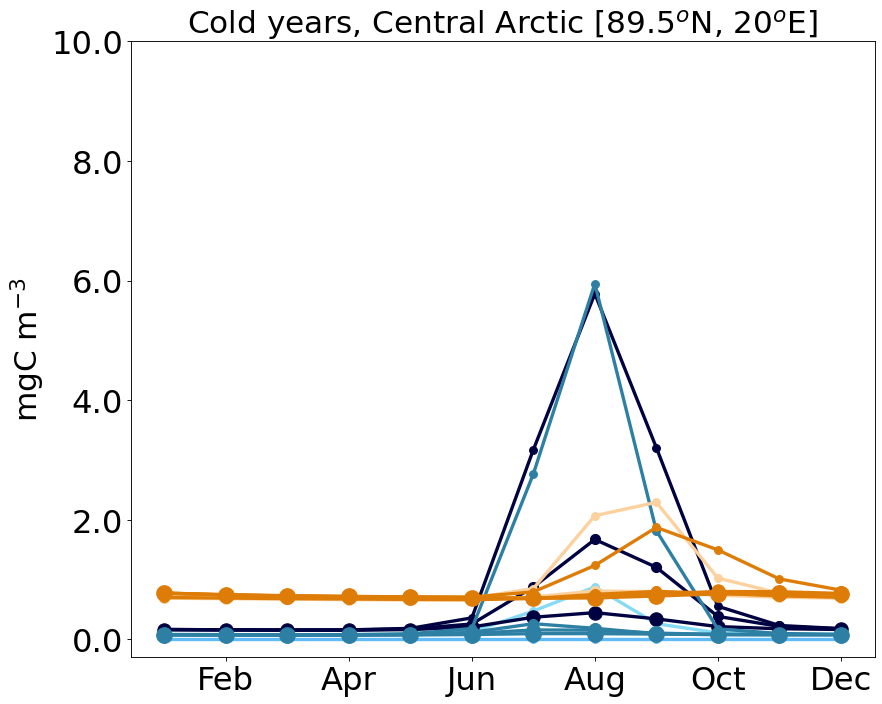

In [111]:
fig = figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
pylab.plot(month,b_phyto_cold[0,:], '-o', color='#86daf4',markersize=7,linewidth = 3,label='picoplankton')
pylab.plot(month,b_phyto_cold[3,:], '-o', color='#000140',markersize=7,linewidth = 3,label='diatom 1')
pylab.plot(month,b_phyto_cold[5,:], '-o', color='#000140',markersize=9,linewidth = 3,label='diatom 2 ')
pylab.plot(month,b_phyto_cold[7,:], '-o', color='#000140',markersize=12,linewidth = 3,label='diatom 3 ')
pylab.plot(month,b_phyto_cold[2,:], '-o', color='#60baf7',markersize=7,linewidth = 3,label='diazotroph ')
pylab.plot(month,b_phyto_cold[1,:], '-o', color='#2d80a4',markersize=7,linewidth = 3,label='mixed phytoplankton 1 ')
pylab.plot(month,b_phyto_cold[4,:], '-o', color='#2d80a4',markersize=9,linewidth = 3,label='mixed phytoplankton 2 ')
pylab.plot(month,b_phyto_cold[6,:], '-o', color='#2d80a4',markersize=12,linewidth = 3,label='mixed phytoplankton 3 ')
pylab.plot(month,b_phyto_cold[8,:], '-o', color='#2d80a4',markersize=14,linewidth = 3,label='mixed phytoplankton 4 ')
pylab.plot(month,b_zoo_cold[0,:], '-o', color='#FCD19E',markersize=7,linewidth = 3,label='micozooplankton 1')
pylab.plot(month,b_zoo_cold[1,:], '-o', color='#FCD19E',markersize=9,linewidth = 3,label='micozooplankton 2')
pylab.plot(month,b_zoo_cold[2,:], '-o', color='#DE7C08',markersize=7,linewidth = 3,label='mesozooplankton 1 ')
pylab.plot(month,b_zoo_cold[3,:], '-o', color='#DE7C08',markersize=9,linewidth = 3,label='mesozooplankton 2 ')
pylab.plot(month,b_zoo_cold[4,:], '-o', color='#DE7C08',markersize=12,linewidth = 3,label='mesozooplankton 3 ')
pylab.plot(month,b_zoo_cold[5,:], '-o', color='#DE7C08',markersize=14,linewidth = 3,label='mesozooplankton 4 ')
#pylab.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
pylab.ylabel('mgC m$^{-3}$', fontsize=28)
plt.ylim(top=10)
pylab.title('Cold years, Central Arctic [89.5$^o$N, 20$^o$E]', fontsize=28)
from matplotlib.pyplot import gca
a = gca()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off
a.set_yticklabels(a.get_yticks())
a.set_xticklabels(['jan','Feb','Apr','Jun','Aug','Oct','Dec'])
#plt.ylim(top=250)
plt.yticks(fontsize= 29,);plt.xticks(fontsize= 29);
pylab.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
env_type='cold_years'
fig.savefig(f'{file}central_arctic_5deg_seasonal_succession_{env_type}.png',dpi=600, bbox_inches='tight')

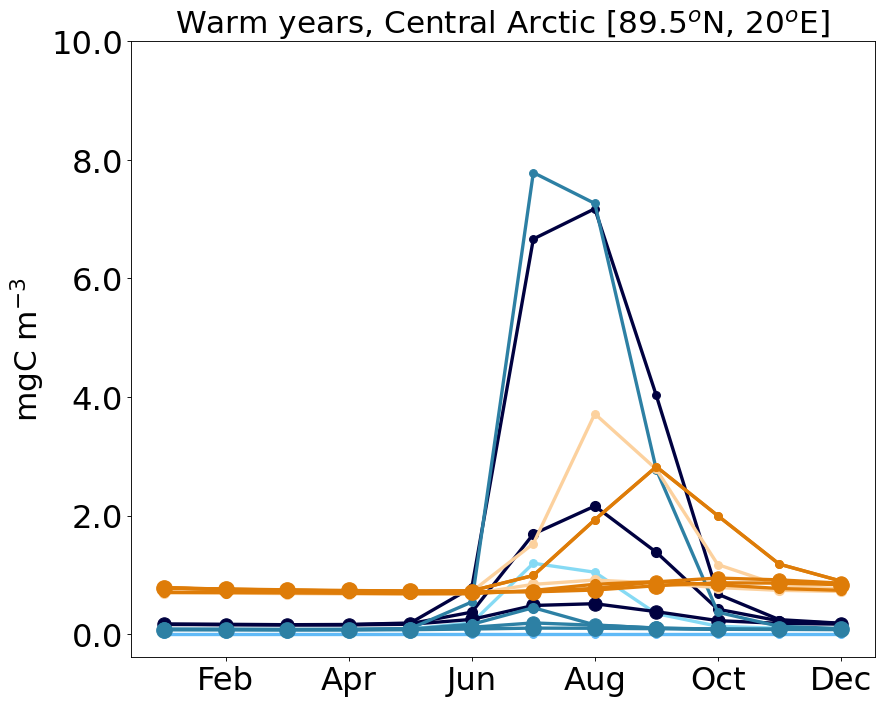

In [112]:
fig = figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
pylab.plot(month,b_phyto_warm[0,:], '-o', color='#86daf4',markersize=7,linewidth = 3,label='picoplankton')
pylab.plot(month,b_phyto_warm[3,:], '-o', color='#000140',markersize=7,linewidth = 3,label='diatom 1')
pylab.plot(month,b_phyto_warm[5,:], '-o', color='#000140',markersize=9,linewidth = 3,label='diatom 2 ')
pylab.plot(month,b_phyto_warm[7,:], '-o', color='#000140',markersize=12,linewidth = 3,label='diatom 3 ')
pylab.plot(month,b_phyto_warm[2,:], '-o', color='#60baf7',markersize=7,linewidth = 3,label='diazotroph ')
pylab.plot(month,b_phyto_warm[1,:], '-o', color='#2d80a4',markersize=7,linewidth = 3,label='mixed phytoplankton 1 ')
pylab.plot(month,b_phyto_warm[4,:], '-o', color='#2d80a4',markersize=9,linewidth = 3,label='mixed phytoplankton 2 ')
pylab.plot(month,b_phyto_warm[6,:], '-o', color='#2d80a4',markersize=12,linewidth = 3,label='mixed phytoplankton 3 ')
pylab.plot(month,b_phyto_warm[8,:], '-o', color='#2d80a4',markersize=14,linewidth = 3,label='mixed phytoplankton 4 ')
pylab.plot(month,b_zoo_warm[0,:], '-o', color='#FCD19E',markersize=7,linewidth = 3,label='micozooplankton 1')
pylab.plot(month,b_zoo_warm[1,:], '-o', color='#FCD19E',markersize=9,linewidth = 3,label='micozooplankton 2')
pylab.plot(month,b_zoo_warm[2,:], '-o', color='#DE7C08',markersize=7,linewidth = 3,label='mesozooplankton 1 ')
pylab.plot(month,b_zoo_warm[2,:], '-o', color='#DE7C08',markersize=7,linewidth = 3,label='mesozooplankton 1 ')
pylab.plot(month,b_zoo_warm[3,:], '-o', color='#DE7C08',markersize=9,linewidth = 3,label='mesozooplankton 2 ')
pylab.plot(month,b_zoo_warm[4,:], '-o', color='#DE7C08',markersize=12,linewidth = 3,label='mesozooplankton 3 ')
pylab.plot(month,b_zoo_warm[5,:], '-o', color='#DE7C08',markersize=14,linewidth = 3,label='mesozooplankton 4 ')
#pylab.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
pylab.ylabel('mgC m$^{-3}$', fontsize=28)
plt.ylim(top=10)
pylab.title('Warm years, Central Arctic [89.5$^o$N, 20$^o$E]', fontsize=28)
from matplotlib.pyplot import gca
a = gca()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off
a.set_yticklabels(a.get_yticks())
a.set_xticklabels(['jan','Feb','Apr','Jun','Aug','Oct','Dec'])
#plt.ylim(top=250)
plt.yticks(fontsize= 29,);plt.xticks(fontsize= 29);
pylab.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
env_type='warm_years'
fig.savefig(f'{file}central_arctic_5deg_seasonal_succession_{env_type}.png',dpi=600, bbox_inches='tight')